# Matrix Multiplication

In this lab you will use `NumPy` functions to perform matrix multiplication and see how it can be used in the Machine Learning applications. 

# Table of Contents

- [ 1 - Definition of Matrix Multiplication](#1)
- [ 2 - Matrix Multiplication using Python](#2)
- [ 3 - Matrix Convention and Broadcasting](#3)

## Packages

Load the `NumPy` package to access its functions.

In [2]:
import numpy as np

<a name='1'></a>
## 1 - Definition of Matrix Multiplication

If $A$ is an $m \times n$ matrix and $B$ is an $n \times p$ matrix, the matrix product $C = AB$ (denoted without multiplication signs or dots) is defined to be the $m \times p$ matrix such that 
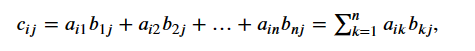

where $a_{ik}$ are the elements of matrix $A$, $b_{kj}$ are the elements of matrix $B$, and $i = 1, \ldots, m$, $k=1, \ldots, n$, $j = 1, \ldots, p$. In other words, $c_{ij}$ is the dot product of the $i$-th row of $A$ and the $j$-th column of $B$.

<a name='2'></a>
## 2 - Matrix Multiplication using Python

Like with the dot product, there are a few ways to perform matrix multiplication in Python. As discussed in the previous lab, the calculations are more efficient in the vectorized form. Let's discuss the most commonly used functions in the vectorized form. First, define two matrices:

In [13]:
A = np.array([[4, 9, 9], [9, 1, 6], [9, 2, 3]])
print("Matrix A (3 by 3):\n", A)

B = np.array([[2, 2], [5, 7], [4, 4]])
print("Matrix B (3 by 2):\n", B)

Matrix A (3 by 3):
 [[4 9 9]
 [9 1 6]
 [9 2 3]]
Matrix B (3 by 2):
 [[2 2]
 [5 7]
 [4 4]]


You can multiply matrices $A$ and $B$ using `NumPy` package function `np.matmul()`:

In [14]:
np.matmul(A, B)

array([[ 89, 107],
       [ 47,  49],
       [ 40,  44]])

Which will output $3 \times 2$ matrix as a `np.array`. Python operator `@` will also work here giving the same result:

In [11]:
A @ B

array([[ 89, 107],
       [ 47,  49],
       [ 40,  44]])

<a name='3'></a>
## 3 - Matrix Convention and Broadcasting

Mathematically, matrix multiplication is defined only if number of the columns of matrix $A$ is equal to the number of the rows of matrix $B$ (you can check again the definition in the secition [1](#1) and see that otherwise the dot products between rows and columns will not be defined). 

Thus, in the example above ([2](#2)), changing the order of matrices when performing the multiplication $BA$ will not work as the above rule does not hold anymore. You can check it by running the cells below - both of them will give errors.

In [ ]:
try:
    np.matmul(B, A)
except ValueError as err:
    print(err)

In [ ]:
try:
    B @ A
except ValueError as err:
    print(err)

So when using matrix multiplication you will need to be very careful about the dimensions - the number of the columns in the first matrix should match the number of the rows in the second matrix. This is very important for your future understanding of Neural Networks and how they work. 

However, for multiplying of the vectors, `NumPy` has a shortcut. You can define two vectors $x$ and $y$ of the same size (which one can understand as two $3 \times 1$ matrices). If you check the shape of the vector $x$, you can see that :

In [ ]:
x = np.array([1, -2, -5])
y = np.array([4, 3, -1])

print("Shape of vector x:", x.shape)
print("Number of dimensions of vector x:", x.ndim)
print("Shape of vector x, reshaped to a matrix:", x.reshape((3, 1)).shape)
print("Number of dimensions of vector x, reshaped to a matrix:", x.reshape((3, 1)).ndim)

Following the matrix convention, multiplication of matrices $3 \times 1$ and $3 \times 1$ is not defined. For matrix multiplication you would expect an error in the following cell, but let's check the output:

In [ ]:
np.matmul(x,y)

You can see that there is no error and that the result is actually a dot product $x \cdot y\,$! So, vector $x$ was automatically transposed into the vector $1 \times 3$ and matrix multiplication $x^Ty$ was calculated. While this is very convenient, you need to keep in mind such functionality in Python and pay attention to not use it in a wrong way. The following cell will return an error:

In [ ]:
try:
    np.matmul(x.reshape((3, 1)), y.reshape((3, 1)))
except ValueError as err:
    print(err)

You might have a question in you mind: does `np.dot()` function also work for matrix multiplication? Let's try it:

In [ ]:
np.dot(A, B)

Yes, it works! What actually happens is what is called **broadcasting** in Python: `NumPy` broadcasts this dot product operation to all rows and all columns, you get the resultant product matrix. Broadcasting also works in other cases, for example:

In [ ]:
A - 2

Mathematically, subtraction of the $3 \times 3$ matrix $A$ and a scalar is not defined, but Python broadcasts the scalar, creating a $3 \times 3$ `np.array` and performing subtraction element by element. A practical example of matrix multiplication can be seen in a linear regression model. You will implement it in this week's assignment!

Congratulations on finishing this lab!